## R for Data Science

[book link](https://r4ds.had.co.nz/index.html)

### The Data Science Pipeline

![](https://r4ds.had.co.nz/diagrams/data-science.png)

First you must import your data into R. This typically means that you take data stored in a file, database, or web API, and load it into a data frame in R. If you can’t get your data into R, you can’t do data science on it!

Once you’ve imported your data, it is a good idea to tidy it. Tidying your data means storing it in a consistent form that matches the semantics of the dataset with the way it is stored. In brief, when your data is tidy, each column is a variable, and each row is an observation. Tidy data is important because the consistent structure lets you focus your struggle on questions about the data, not fighting to get the data into the right form for different functions.

Once you have tidy data, a common first step is to transform it. Transformation includes narrowing in on observations of interest (like all people in one city, or all data from the last year), creating new variables that are functions of existing variables (like computing speed from distance and time), and calculating a set of summary statistics (like counts or means). Together, tidying and transforming are called wrangling, because getting your data in a form that’s natural to work with often feels like a fight!

Once you have tidy data with the variables you need, there are two main engines of knowledge generation: visualisation and modelling. These have complementary strengths and weaknesses so any real analysis will iterate between them many times.

Visualisation is a fundamentally human activity. A good visualisation will show you things that you did not expect, or raise new questions about the data. A good visualisation might also hint that you’re asking the wrong question, or you need to collect different data. Visualisations can surprise you, but don’t scale particularly well because they require a human to interpret them.

Models are complementary tools to visualisation. Once you have made your questions sufficiently precise, you can use a model to answer them. Models are a fundamentally mathematical or computational tool, so they generally scale well. Even when they don’t, it’s usually cheaper to buy more computers than it is to buy more brains! But every model makes assumptions, and by its very nature a model cannot question its own assumptions. That means a model cannot fundamentally surprise you.

The last step of data science is communication, an absolutely critical part of any data analysis project. It doesn’t matter how well your models and visualisation have led you to understand the data unless you can also communicate your results to others.

Surrounding all these tools is programming. Programming is a cross-cutting tool that you use in every part of the project. You don’t need to be an expert programmer to be a data scientist, but learning more about programming pays off because becoming a better programmer allows you to automate common tasks, and solve new problems with greater ease.

You’ll use these tools in every data science project, but for most projects they’re not enough. There’s a rough 80-20 rule at play; you can tackle about 80% of every project using the tools that you’ll learn in this book, but you’ll need other tools to tackle the remaining 20%. Throughout this book we’ll point you to resources where you can learn more.

In [1]:
install.packages("tidyverse")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.1     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [7]:
install.packages(c("nycflights13", "gapminder", "Lahman"))


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


## Data visualisation

[link](https://r4ds.had.co.nz/data-visualisation.html)

> “The simple graph has brought more information to the data analyst’s mind than any other device.” — John Tukey

### mpg dataframe

    Question: Do cars with big engines use more fuel than cars with small engines? What does the relationship between engine size and fuel efficiency look like? Is it positive? Negative? Linear? Nonlinear?
    
You can test your answer with the mpg data frame found in ggplot2 (aka ggplot2::mpg). A data frame is a rectangular collection of variables (in the columns) and observations (in the rows). mpg contains observations collected by the US Environmental Protection Agency on 38 models of car.



In [8]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


Among the variables in mpg are:

1. displ, a car’s engine size, in litres.

2. hwy, a car’s fuel efficiency on the highway, in miles per gallon (mpg). 

A car with a low fuel efficiency consumes more fuel than a car with a high fuel efficiency when they travel the same distance.



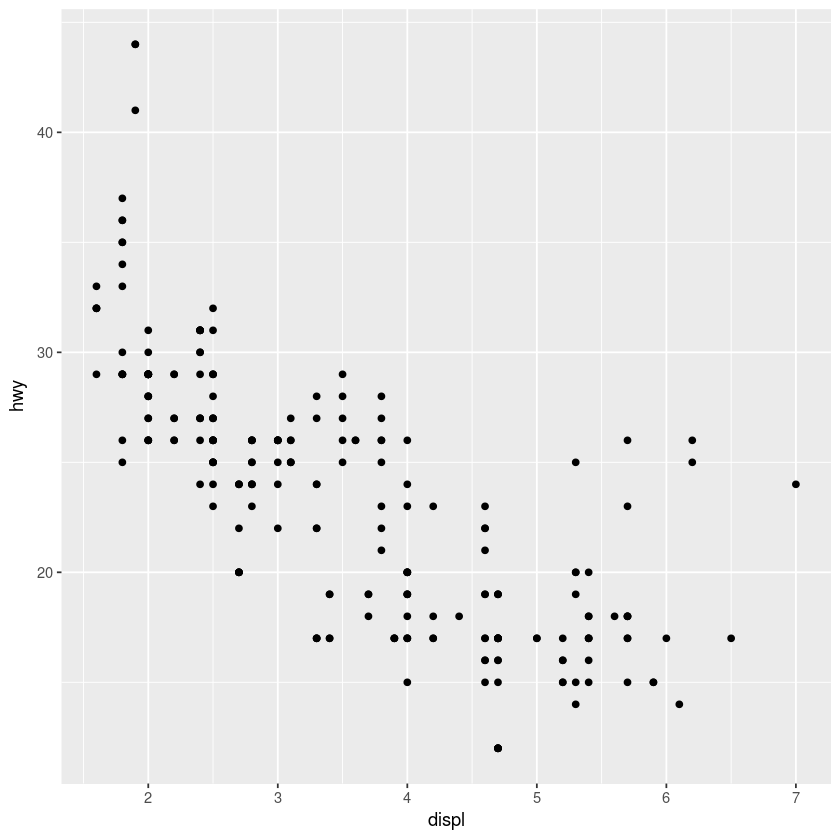

In [9]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy))

The plot shows a negative relationship between engine size (displ) and fuel efficiency (hwy). In other words, cars with big engines use more fuel. Does this confirm or refute your hypothesis about fuel efficiency and engine size?

With ggplot2, you begin a plot with the function ggplot(). ggplot() creates a coordinate system that you can add layers to. The first argument of ggplot() is the dataset to use in the graph. So ggplot(data = mpg) creates an empty graph, but it’s not very interesting so I’m not going to show it here.

You complete your graph by adding one or more layers to ggplot(). The function geom_point() adds a layer of points to your plot, which creates a scatterplot. ggplot2 comes with many geom functions that each add a different type of layer to a plot. You’ll learn a whole bunch of them throughout this chapter.

Each geom function in ggplot2 takes a mapping argument. This defines how variables in your dataset are mapped to visual properties. The mapping argument is always paired with aes(), and the x and y arguments of aes() specify which variables to map to the x and y axes. ggplot2 looks for the mapped variables in the data argument, in this case, mpg.

Let’s turn this code into a reusable template for making graphs with ggplot2. To make a graph, replace the bracketed sections in the code below with a dataset, a geom function, or a collection of mappings.

```R

ggplot(data = <DATA>) + 
  <GEOM_FUNCTION>(mapping = aes(<MAPPINGS>))
      
```

The rest of this chapter will show you how to complete and extend this template to make different types of graphs. We will begin with the <MAPPINGS> component.
    
### Exercises

Run ggplot(data = mpg). What do you see? - Blank canvas

How many rows are in mpg? How many columns? 234, 11

What does the drv variable describe? Read the help for ?mpg to find out. - f = front-wheel drive, r = rear wheel drive, 4 = 4wd

Make a scatterplot of hwy vs cyl.

What happens if you make a scatterplot of class vs drv? Why is the plot not useful? Both are categorical vars

In [14]:
dim(mpg)

[1] 234  11

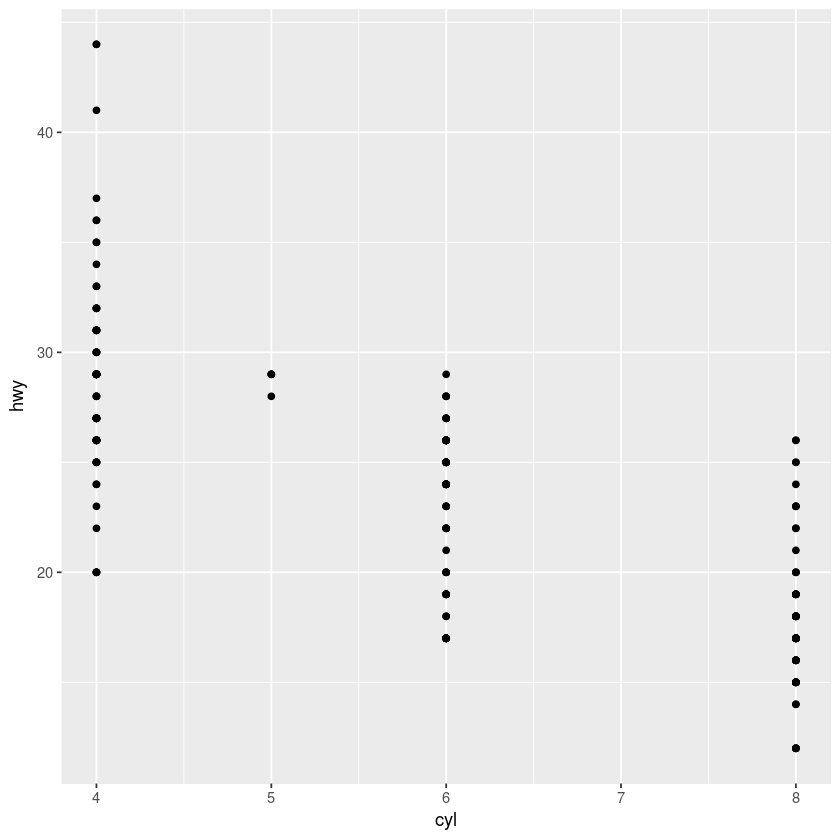

In [16]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = cyl, y = hwy))

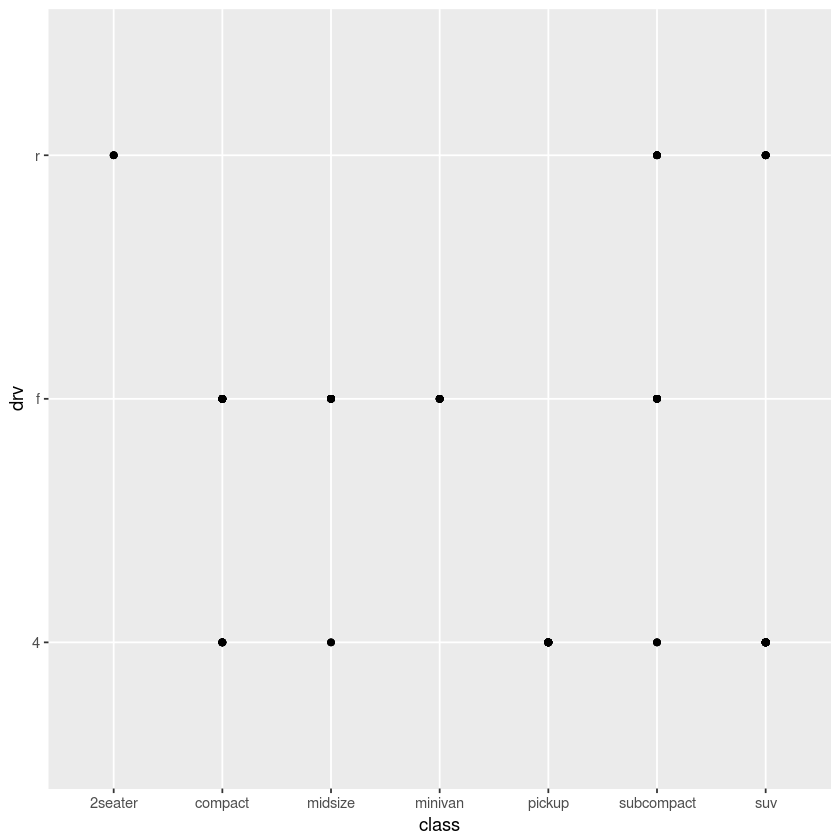

In [17]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = class, y = drv))

###  Aesthetic mappings

In the plot below, one group of points (highlighted in red) seems to fall outside of the linear trend. These cars have a higher mileage than you might expect. How can you explain these cars?

![](https://r4ds.had.co.nz/visualize_files/figure-html/unnamed-chunk-6-1.png)

Let’s hypothesize that the cars are hybrids. One way to test this hypothesis is to look at the class value for each car. The class variable of the mpg dataset classifies cars into groups such as compact, midsize, and SUV. If the outlying points are hybrids, they should be classified as compact cars or, perhaps, subcompact cars (keep in mind that this data was collected before hybrid trucks and SUVs became popular).

You can add a third variable, like class, to a two dimensional scatterplot by mapping it to an aesthetic. An aesthetic is a visual property of the objects in your plot. Aesthetics include things like the size, the shape, or the color of your points. You can display a point (like the one below) in different ways by changing the values of its aesthetic properties. Since we already use the word “value” to describe data, let’s use the word “level” to describe aesthetic properties. Here we change the levels of a point’s size, shape, and color to make the point small, triangular, or blue:

You can convey information about your data by mapping the aesthetics in your plot to the variables in your dataset. For example, you can map the colors of your points to the class variable to reveal the class of each car.



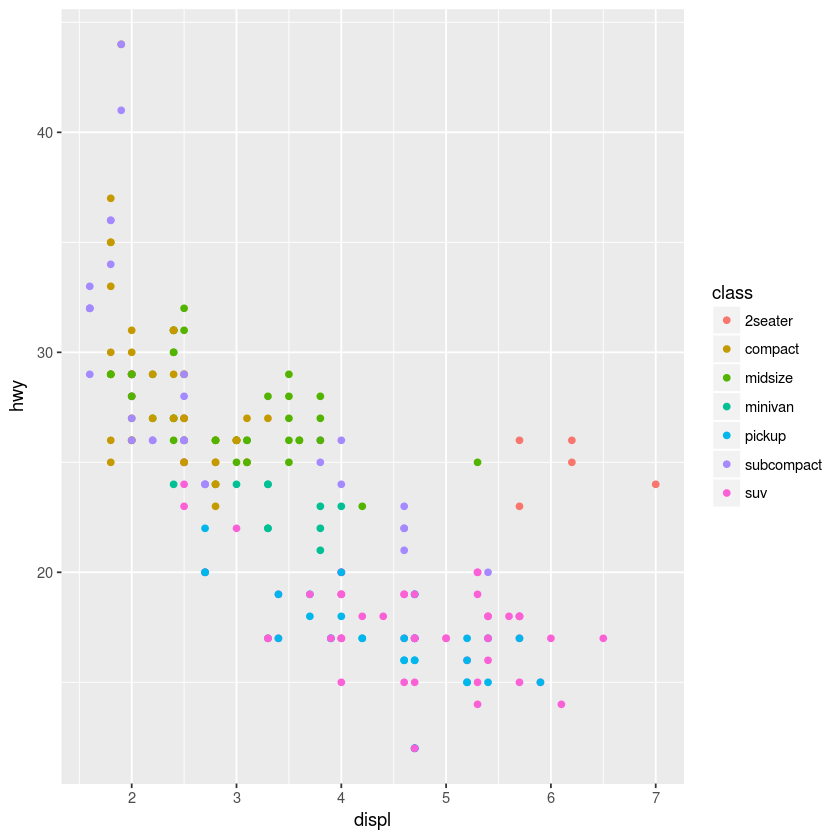

In [18]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = class))

To map an aesthetic to a variable, associate the name of the aesthetic to the name of the variable inside aes(). ggplot2 will automatically assign a unique level of the aesthetic (here a unique color) to each unique value of the variable, a process known as scaling. ggplot2 will also add a legend that explains which levels correspond to which values.

The colors reveal that many of the unusual points are two-seater cars. These cars don’t seem like hybrids, and are, in fact, sports cars! Sports cars have large engines like SUVs and pickup trucks, but small bodies like midsize and compact cars, which improves their gas mileage. In hindsight, these cars were unlikely to be hybrids since they have large engines.

In the above example, we mapped class to the color aesthetic, but we could have mapped class to the size aesthetic in the same way. In this case, the exact size of each point would reveal its class affiliation. We get a warning here, because mapping an unordered variable (class) to an ordered aesthetic (size) is not a good idea.



Warning message:
“Using size for a discrete variable is not advised.”

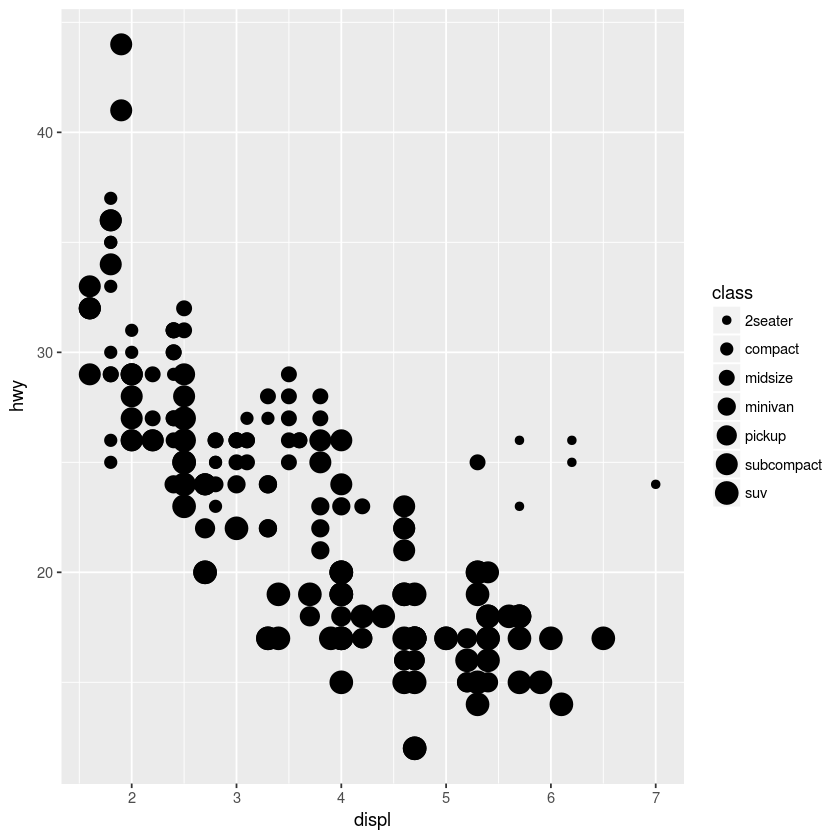

In [19]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, size = class))

Or we could have mapped class to the alpha aesthetic, which controls the transparency of the points, or to the shape aesthetic, which controls the shape of the points.



Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them.”Warning message:
“Removed 62 rows containing missing values (geom_point).”

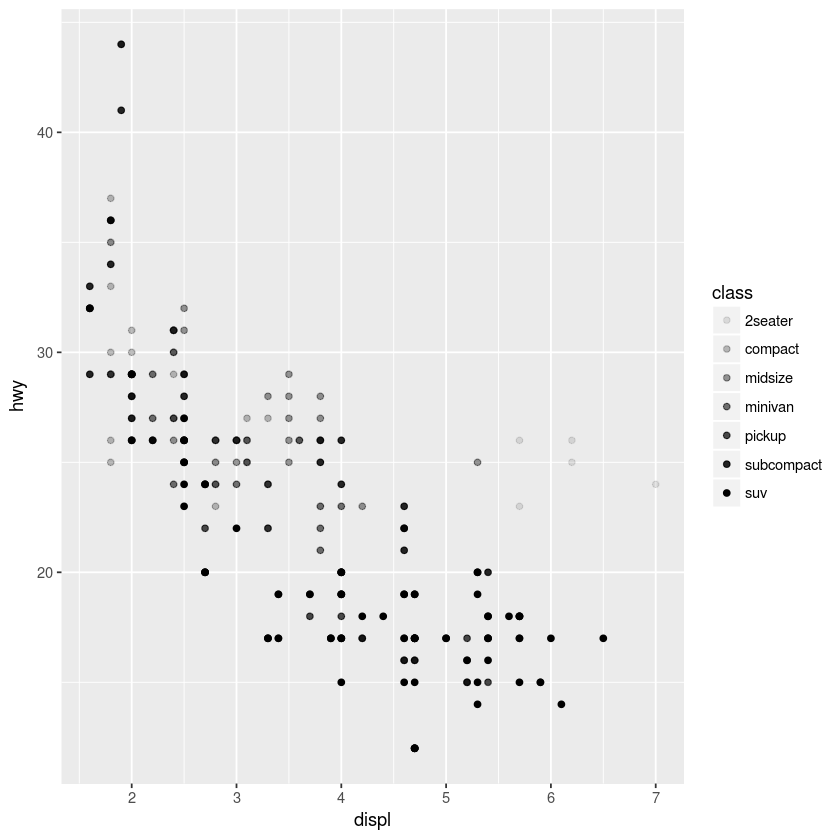

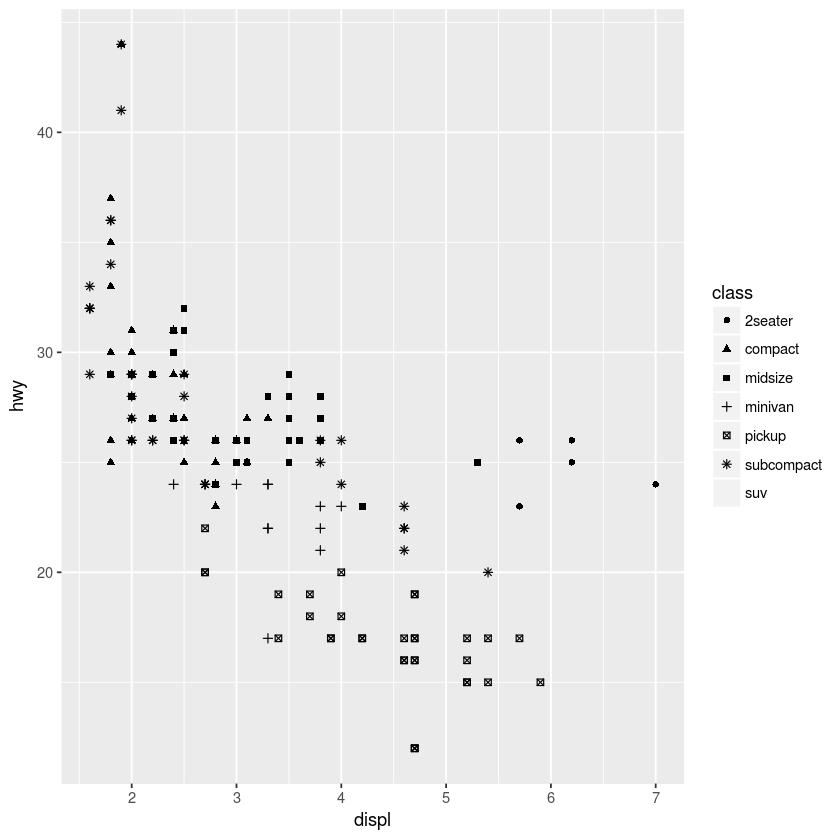

In [20]:
# Left
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, alpha = class))

# Right
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, shape = class))

What happened to the SUVs? ggplot2 will only use six shapes at a time. By default, additional groups will go unplotted when you use the shape aesthetic.

What happened to the SUVs? ggplot2 will only use six shapes at a time. By default, additional groups will go unplotted when you use the shape aesthetic.

For each aesthetic, you use aes() to associate the name of the aesthetic with a variable to display. The aes() function gathers together each of the aesthetic mappings used by a layer and passes them to the layer’s mapping argument. The syntax highlights a useful insight about x and y: the x and y locations of a point are themselves aesthetics, visual properties that you can map to variables to display information about the data.

Once you map an aesthetic, ggplot2 takes care of the rest. It selects a reasonable scale to use with the aesthetic, and it constructs a legend that explains the mapping between levels and values. For x and y aesthetics, ggplot2 does not create a legend, but it creates an axis line with tick marks and a label. The axis line acts as a legend; it explains the mapping between locations and values.

You can also set the aesthetic properties of your geom manually. For example, we can make all of the points in our plot blue:

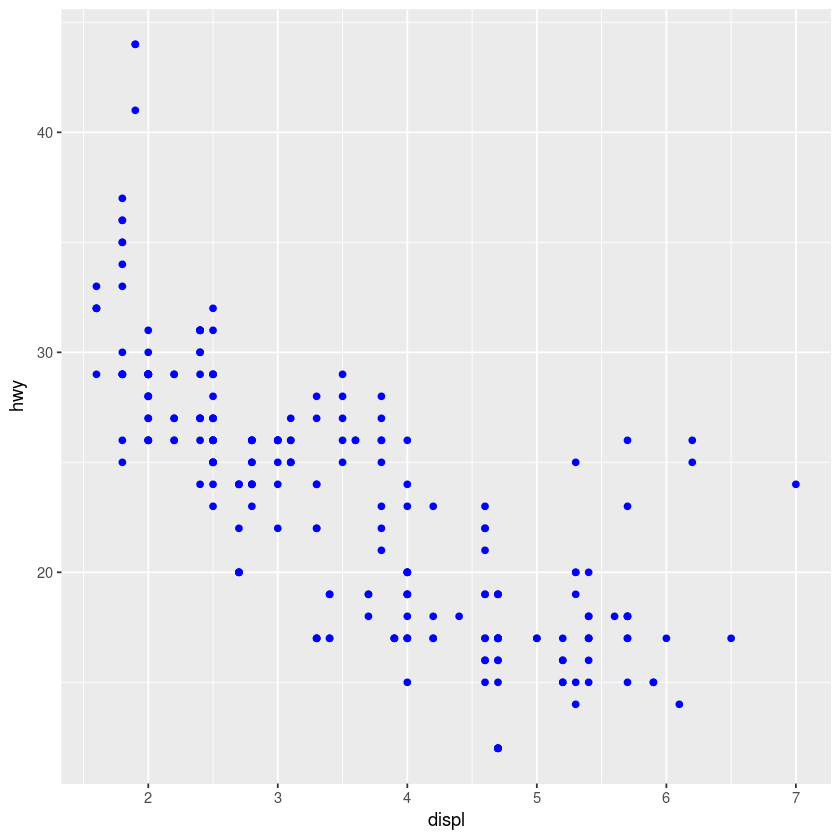

In [21]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy), color = "blue")

Here, the color doesn’t convey information about a variable, but only changes the appearance of the plot. To set an aesthetic manually, set the aesthetic by name as an argument of your geom function; i.e. it goes outside of aes(). You’ll need to pick a level that makes sense for that aesthetic:

- The name of a color as a character string.

- The size of a point in mm.

- The shape of a point as a number, as shown in Figure 3.1.

![](https://r4ds.had.co.nz/visualize_files/figure-html/shapes-1.png)

R has 25 built in shapes that are identified by numbers. There are some seeming duplicates: for example, 0, 15, and 22 are all squares. The difference comes from the interaction of the colour and fill aesthetics. The hollow shapes (0–14) have a border determined by colour; the solid shapes (15–18) are filled with colour; the filled shapes (21–24) have a border of colour and are filled with fill.

### Exercises

- What’s gone wrong with this code? Why are the points not blue? - was assigned as a level



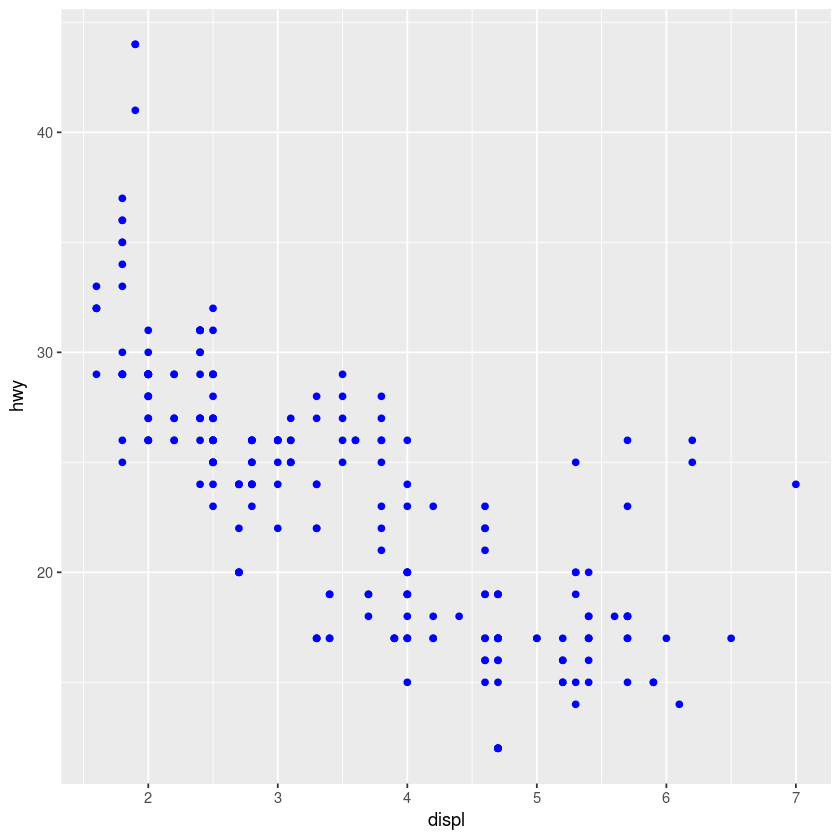

In [23]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy), color = "blue")

- Which variables in mpg are categorical? Which variables are continuous? (Hint: type ?mpg to read the documentation for the dataset). How can you see this information when you run mpg?

Categorical: manufacturer, model, trans, drv, fl, class	


Continuous: displ, year, cyl, cty, hwy 

- Map a continuous variable to color, size, and shape. How do these aesthetics behave differently for categorical vs. continuous variables?

- What happens if you map the same variable to multiple aesthetics?

- What does the stroke aesthetic do? What shapes does it work with? (Hint: use ?geom_point)

- What happens if you map an aesthetic to something other than a variable name, like aes(colour = displ < 5)? Note, you’ll also need to specify x and y.

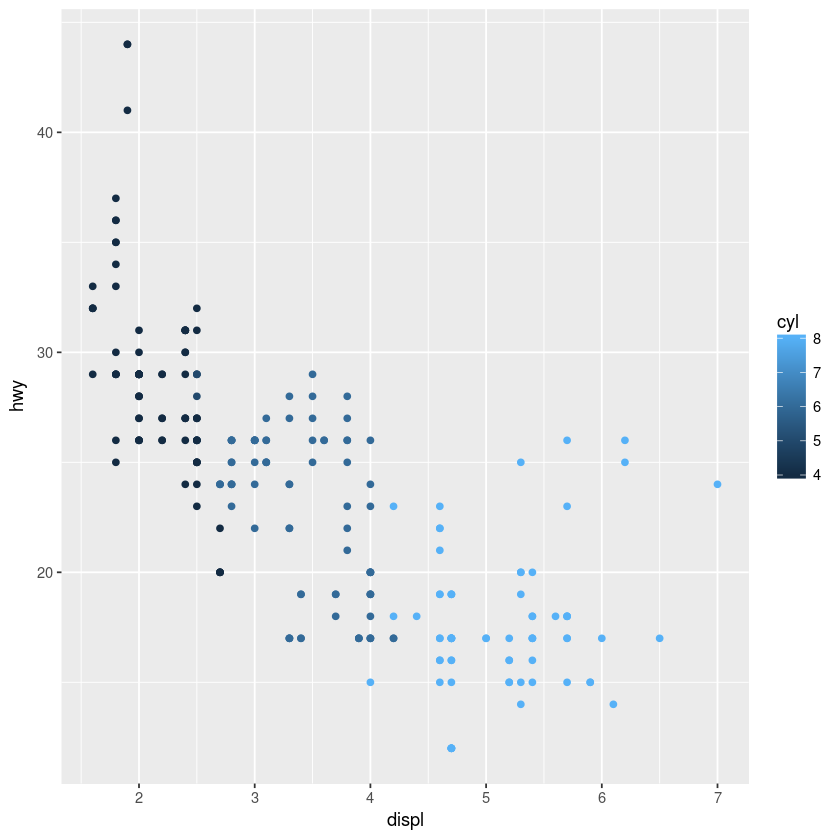

In [35]:
# mapping cont var (cyl) to color
# Note: a cont var CANNOT be mapped to shape, for obvious reasons

ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = cyl))

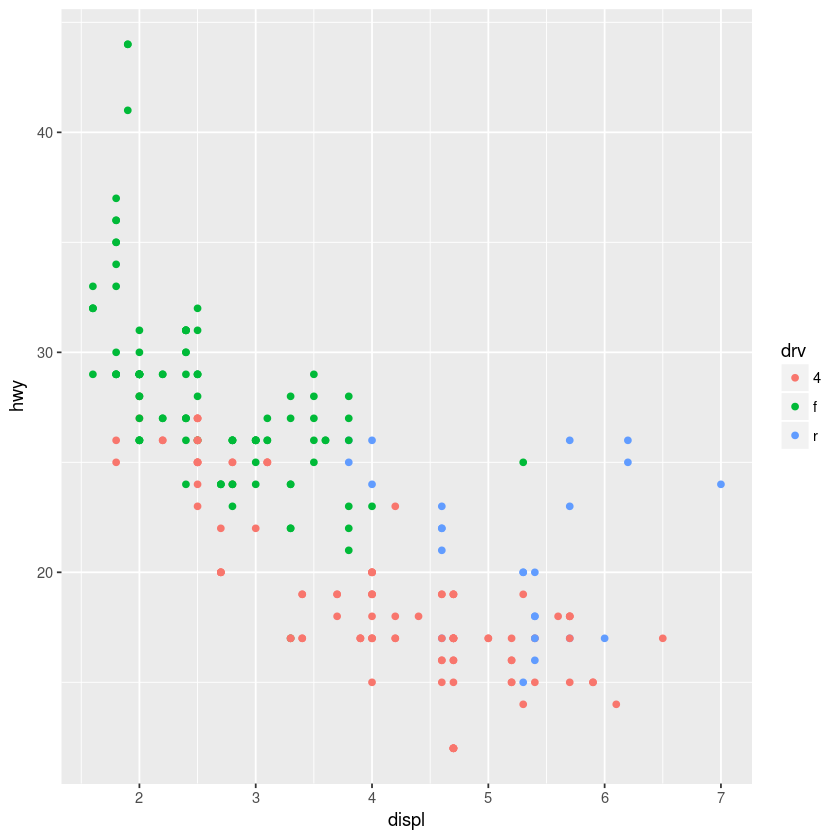

In [39]:
# mapping cat var (drv) to color
# Note: a cat var SHOULD NOT be mapped to size, which have an order to them, for obvious reasons.
# shape and color work fine 

ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = drv))

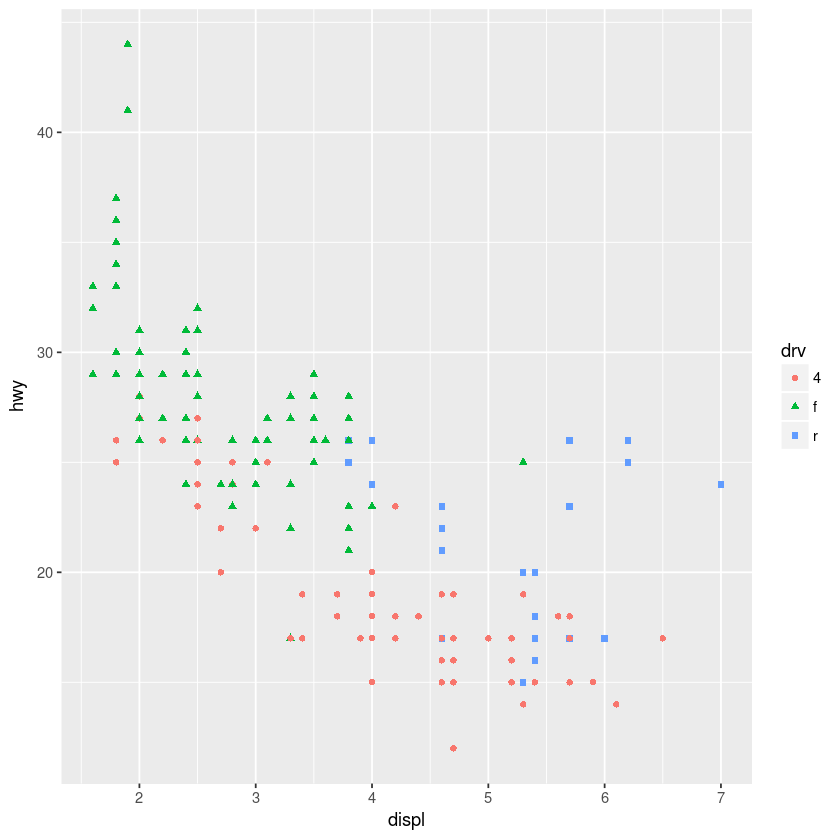

In [44]:
# mapping the var: drv to both color and shape.. effect is quite nice

ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = drv, shape = drv))

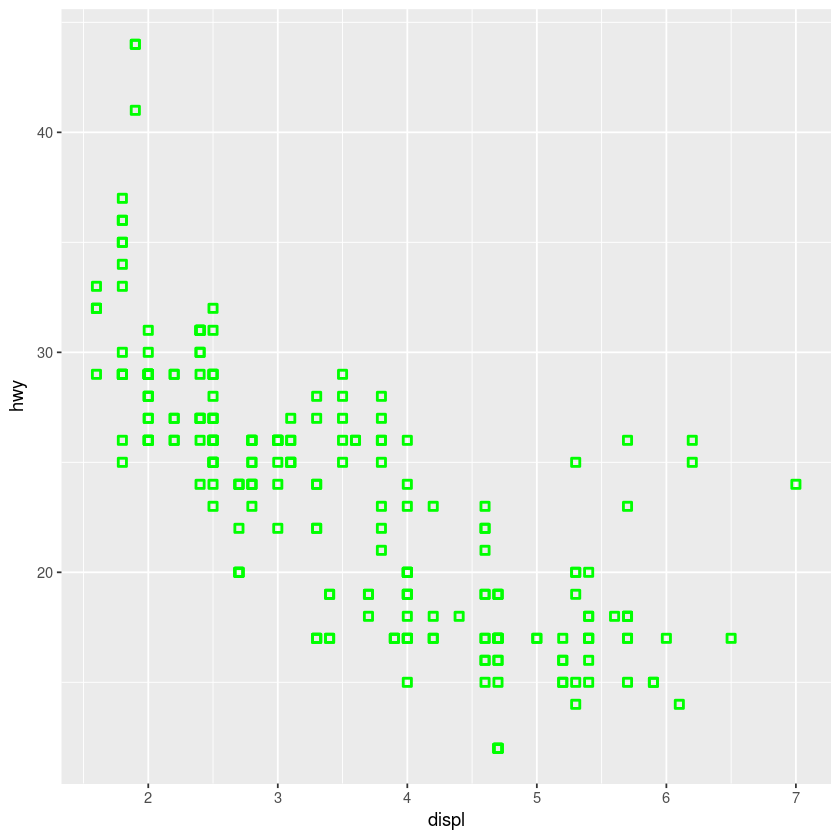

In [65]:
# stroke, shape and color

ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy), shape = 0, color = "green", stroke = 1.2)

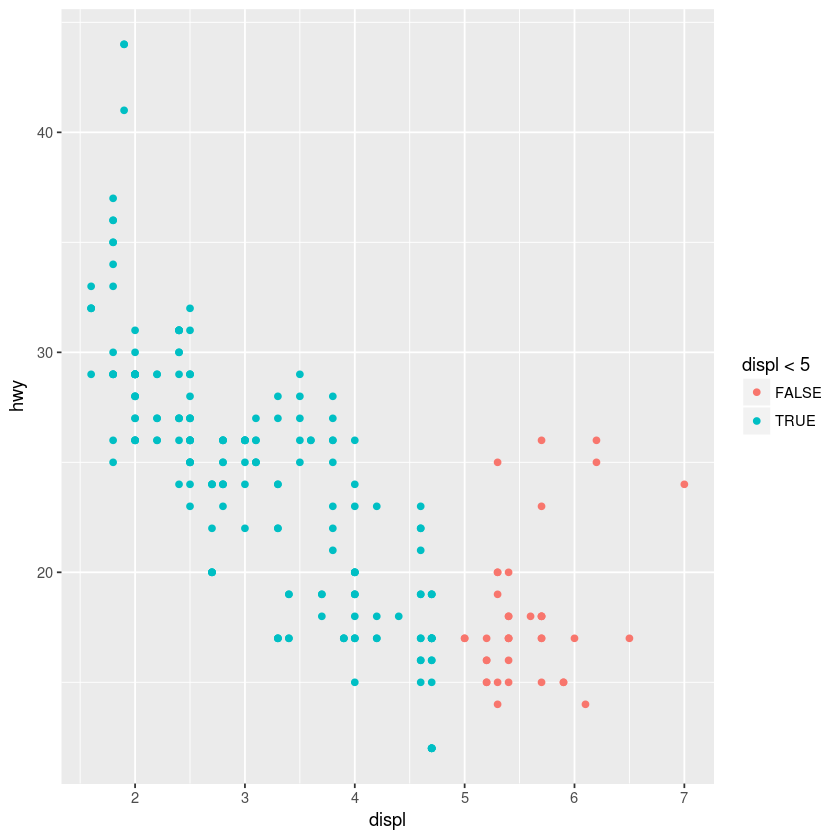

In [68]:
# mapping color to a condn : which evals to T or F, hence we get 2 color levels

ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = displ < 5))